## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [3]:
df = pd.read_csv("clean_data.csv")

In [4]:
df.shape

(10754, 22)

In [5]:
df.head(2)

Unnamed: 0               team          name    position  height   age  \
0           0  Manchester United  David de Gea  Goalkeeper   189.0  32.0   
1           1  Manchester United  Jack Butland  Goalkeeper   196.0  30.0   

   appearance  goals  assists  yellow cards  ...  goals conceded  \
0         104    0.0      0.0      0.009585  ...        1.217252   
1          15    0.0      0.0      0.069018  ...        1.242331   

   clean sheets  minutes played  days_injured  games_injured  award  \
0      0.335463            9390            42              5     13   
1      0.207055            1304           510             58      1   

   current_value  highest_value  position_encoded  winger  
0       15000000       70000000                 1       0  
1        1500000       22000000                 1       0  

[2 rows x 22 columns]

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [12]:
df.duplicated().sum()

0

In [14]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, team, name, position, height, age, appearance, goals, assists, yellow cards, second yellow cards, red cards, goals conceded, clean sheets, minutes played, days_injured, games_injured, award, current_value, highest_value, position_encoded, winger]
Index: []

[0 rows x 22 columns]

In [16]:
# Completeness
df.isnull().sum()

Unnamed: 0             0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [18]:
# Accurecy types
df.dtypes

Unnamed: 0               int64
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [20]:
df.columns

Index(['Unnamed: 0', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [22]:
# delete columns not needed 
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [24]:
# delete columns not needed 
df.drop(['name'], axis=1, inplace=True)

In [26]:
# delete columns not needed 
df.drop(['position_encoded'], axis=1, inplace=True)

In [28]:
# I decide to delete position encoded because its deppend on other column: "position"

In [30]:
# delete columns not needed 
df.drop(['minutes played'], axis=1, inplace=True)

In [32]:
# I decide to delete minutes played because its deppend on other column: "appearance"

In [34]:
# delete columns not needed 
df.drop(['days_injured'], axis=1, inplace=True)

In [36]:
# I decide to delete days_injured because its deppend on other column: "games_injured"

In [38]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'games_injured', 'award', 'current_value',
       'highest_value', 'winger'],
      dtype='object')

In [40]:
df.head(2)

team    position  height   age  appearance  goals  assists  \
0  Manchester United  Goalkeeper   189.0  32.0         104    0.0      0.0   
1  Manchester United  Goalkeeper   196.0  30.0          15    0.0      0.0   

   yellow cards  second yellow cards  red cards  goals conceded  clean sheets  \
0      0.009585                  0.0        0.0        1.217252      0.335463   
1      0.069018                  0.0        0.0        1.242331      0.207055   

   games_injured  award  current_value  highest_value  winger  
0              5     13       15000000       70000000       0  
1             58      1        1500000       22000000       0

In [42]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 
                    'yellow cards', 'second yellow cards', 'red cards', 
                    'goals conceded', 'clean sheets', 
                    'games_injured', 'award', 'highest_value',  'winger']

In [44]:
for i in categorical_features:
    print(df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


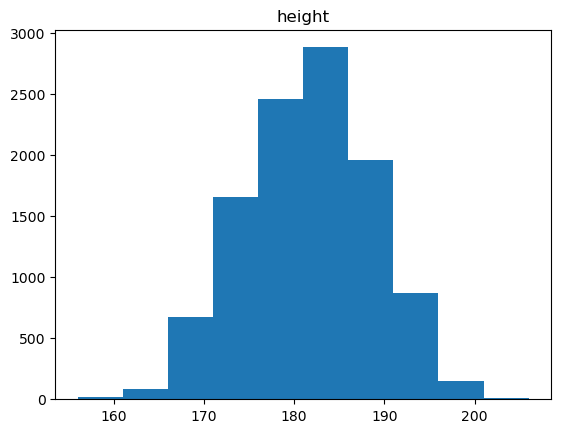

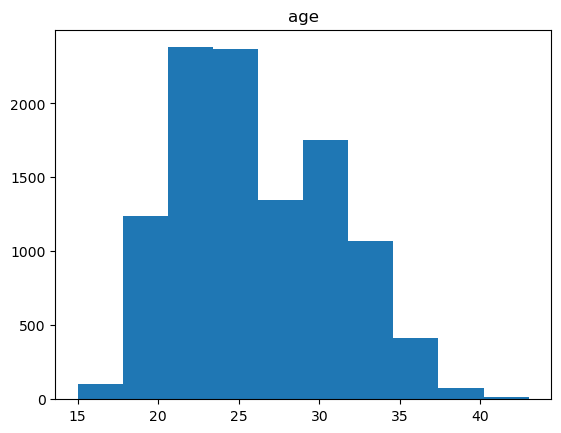

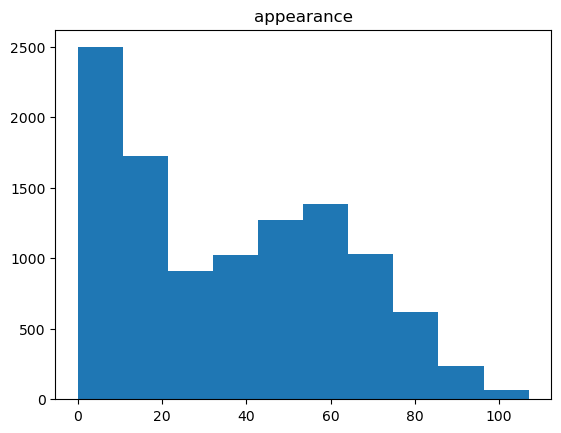

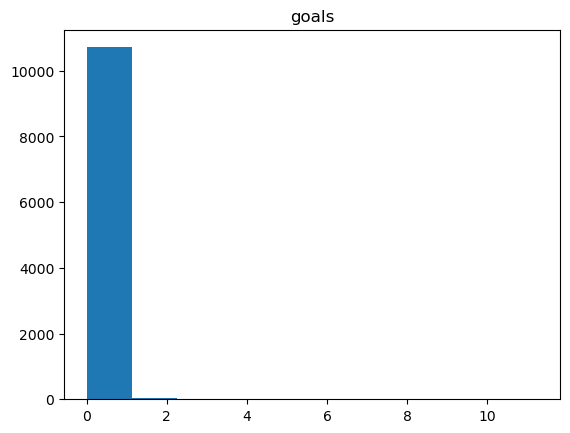

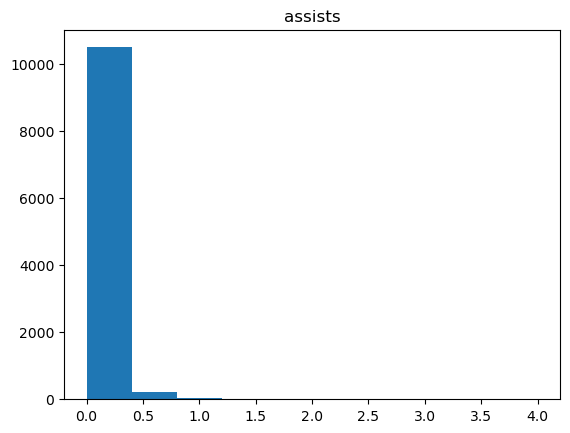

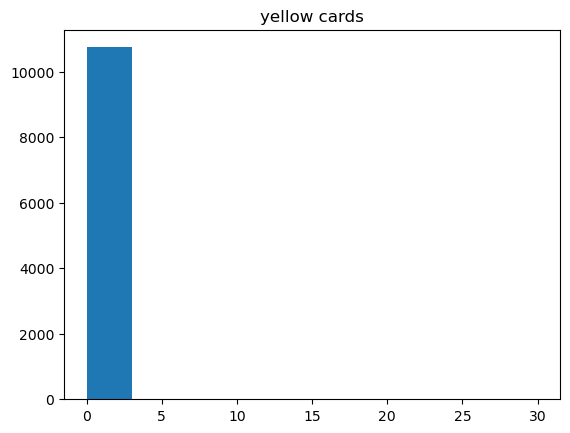

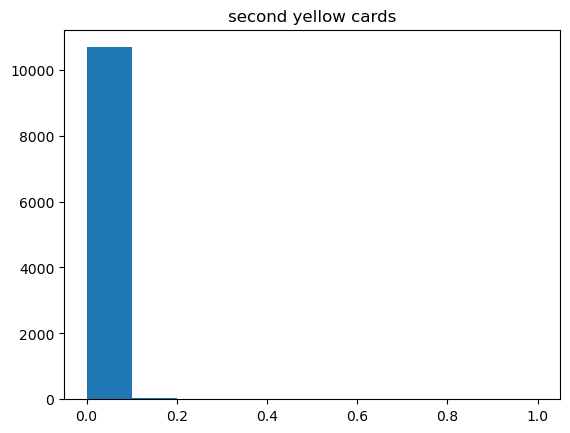

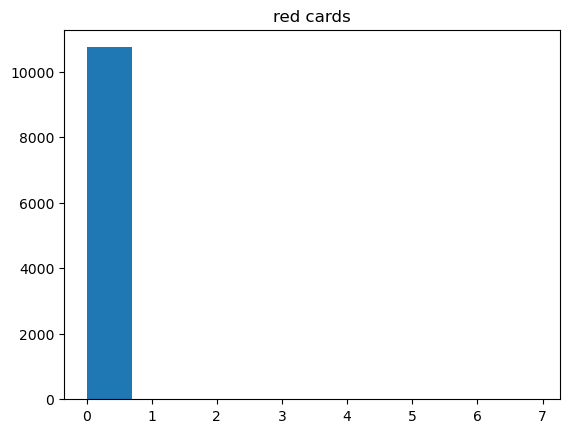

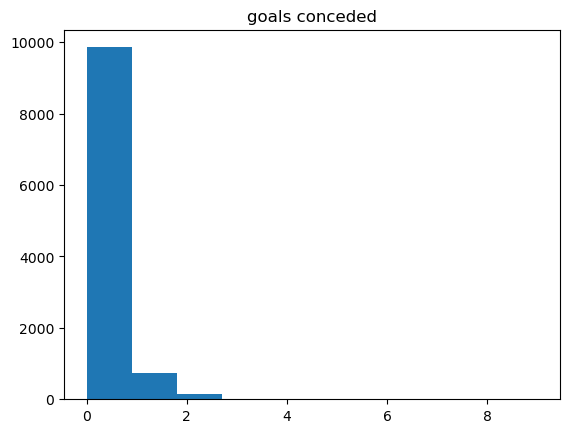

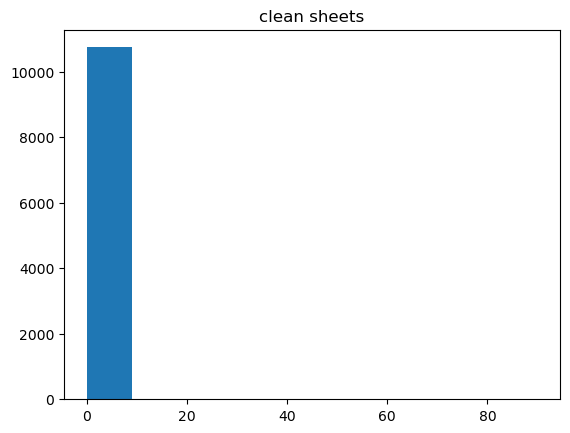

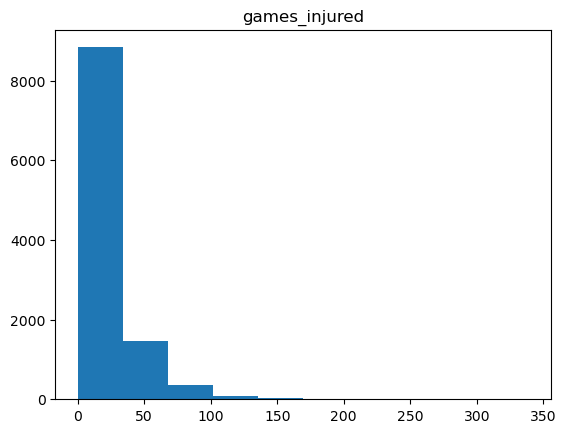

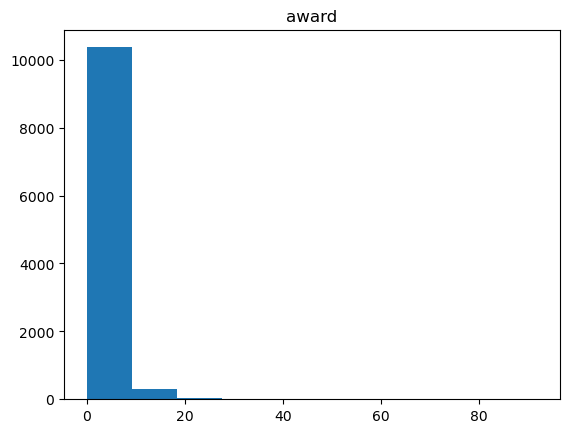

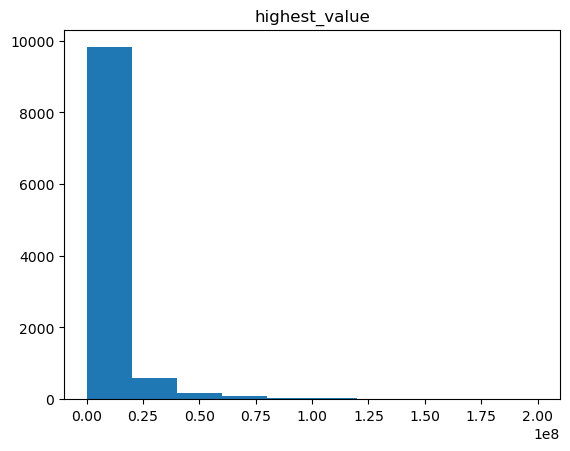

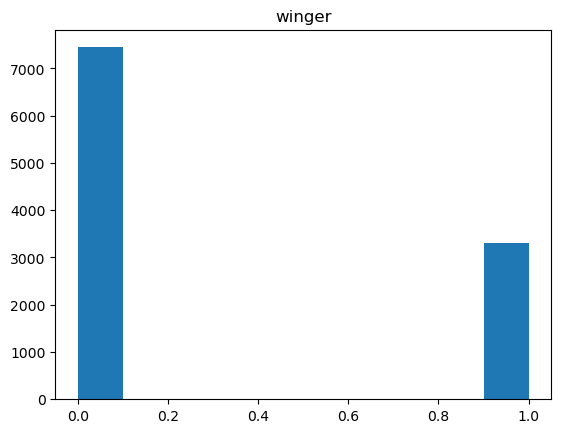

In [46]:
for i in numeric_features:
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

In [47]:
df.shape

(10754, 17)

In [48]:
(df['current_value'] <= 8000).value_counts()

current_value
False    10587
True       167
Name: count, dtype: int64

In [49]:
df[(df['height']>= 165)].shape

(10698, 17)

In [50]:
df = df[(df['height']>= 170) & (df['height']<= 200)]

In [56]:
df.shape

(10287, 17)

In [58]:
df = df[(df['age']>= 17) & (df['age']<= 35)]

In [60]:
df.shape

(9946, 17)

In [62]:
df = df[df['appearance']>= 10]

In [64]:
df.shape

(7889, 17)

In [66]:
df = df[df['games_injured']<= 95]

In [68]:
df.shape

(7792, 17)

In [70]:
df = df[df['award']<= 50]

In [72]:
df.shape

(7789, 17)

In [74]:
df = df[df['highest_value']> 55000]

In [76]:
df.shape

(7610, 17)

In [78]:
#df = df[df['current_value']> 80000]

In [80]:
#df.shape

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [84]:
df.head(2)

team    position  height   age  appearance  goals  assists  \
0  Manchester United  Goalkeeper   189.0  32.0         104    0.0      0.0   
1  Manchester United  Goalkeeper   196.0  30.0          15    0.0      0.0   

   yellow cards  second yellow cards  red cards  goals conceded  clean sheets  \
0      0.009585                  0.0        0.0        1.217252      0.335463   
1      0.069018                  0.0        0.0        1.242331      0.207055   

   games_injured  award  current_value  highest_value  winger  
0              5     13       15000000       70000000       0  
1             58      1        1500000       22000000       0

In [88]:
df.shape

(7610, 17)

#### 3. Feature selection

In [92]:
df = df[['appearance', 'award', 'current_value']]

In [94]:
df.head()

appearance  award  current_value
0         104     13       15000000
1          15      1        1500000
3          82      9       50000000
4          63     21       40000000
5          68      1       25000000

#### 4. Prepare train and test data

In [96]:
# Prepare data
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
X.shape

(7610, 3)

## Buliding the Model

In [100]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

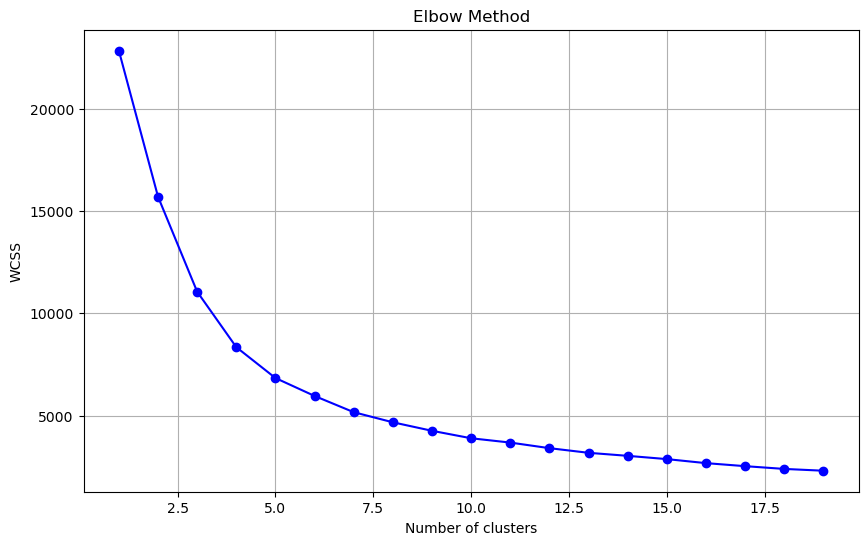

In [102]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [104]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train the Model

In [106]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

## Test the Model

In [127]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model

In [108]:
X.head(2)

appearance  award  current_value
0         104     13       15000000
1          15      1        1500000

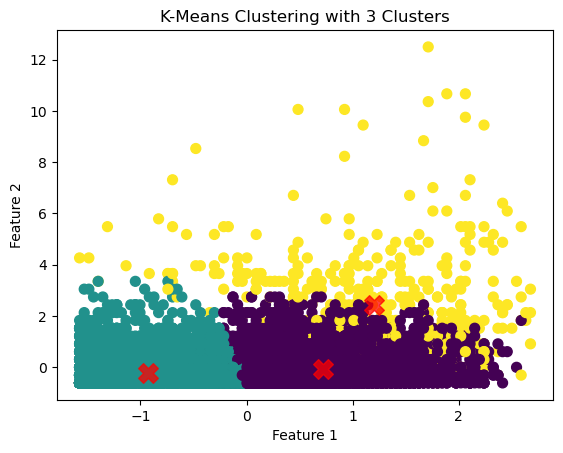

In [110]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [112]:
X['kmeans'] = y_pred

In [114]:
X['kmeans'].value_counts()

kmeans
0    3688
1    3465
2     457
Name: count, dtype: int64

In [116]:
X[X['kmeans']==0]

appearance  award  current_value  kmeans
5              68      1       25000000       0
13             60      1       22000000       0
15             76      2       25000000       0
21             51      1         800000       0
25             63      1       25000000       0
...           ...    ...            ...     ...
10723          48      0         300000       0
10727          51      2         500000       0
10730          47      0         400000       0
10732          50      4         250000       0
10745          45      1         700000       0

[3688 rows x 4 columns]

<Axes: xlabel='appearance', ylabel='current_value'>

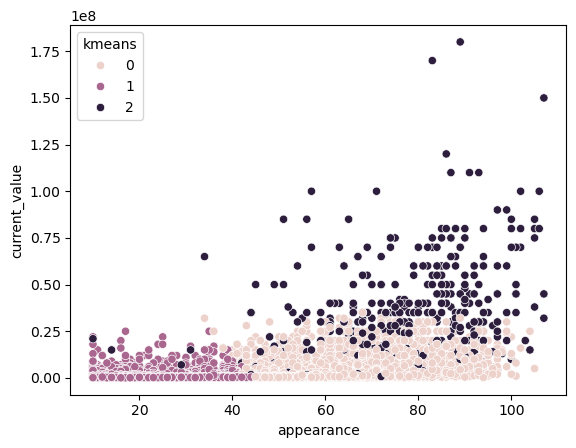

In [120]:
sns.scatterplot(data = X , x = 'appearance', y = 'current_value', hue = 'kmeans')

<Axes: xlabel='award', ylabel='current_value'>

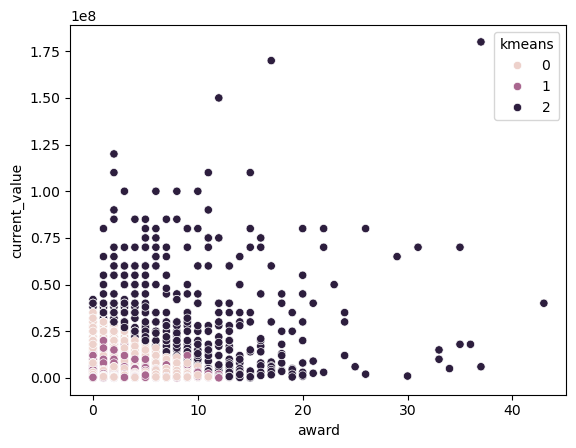

In [124]:
sns.scatterplot(data = X , x = 'award', y = 'current_value', hue = 'kmeans')

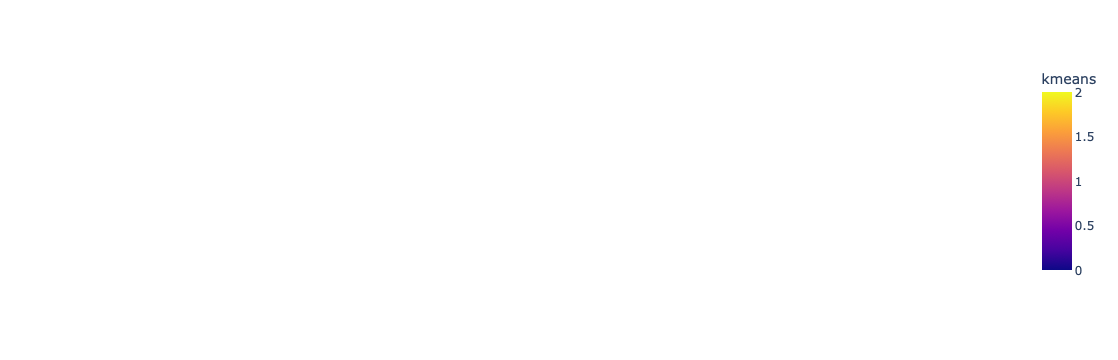

In [126]:
import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='appearance', y='award', z='current_value',
              color='kmeans')
fig.show()